In [1]:
import numpy as np
import glob
from construct_dataset import npy_toxarray

import psyplot
import psyplot.project as psy
from psy_maps.plotters import FieldPlotter

# Check preprocessing

## low resolution

In [2]:
path = '/lustre/fsn1/projects/rech/psl/upu87pm/high_res_data/all_stride_349_test/'
grid_b = '../BuildGrid/grid_hr_with_boundaries.nc'

In [3]:
path_ = '/gpfswork/rech/psl/upu87pm/_hyrid_climate_modelling_/data_processing/normalization_factors/glob_low_res/'

col1_mean_GLOB = np.load(path_ + 'col1_mean_GLOB.npy')
col1_std_GLOB = np.load(path_ + 'col1_std_GLOB.npy')

col1_mean_GLOB_o = np.load(path_ + 'col1_mean_GLOB_o.npy')
col1_std_GLOB_o = np.load(path_ + 'col1_std_GLOB_o.npy')

col1_std_GLOB = np.nan_to_num(col1_std_GLOB, nan=1e-20)
col1_std_GLOB_o = np.nan_to_num(col1_std_GLOB_o, nan=1e-20)
col1_std_GLOB_o[col1_std_GLOB_o==0.] = 1e-20

In [4]:
files = glob.glob(path + 'input_*.npy')
files = sorted(files)
n = np.load(files[0]).shape[0]
print("found ", len(files), "files for test set, each of them contains ", n, "samples ==> ", len(files)*n, "samples")

found  80 files for test set, each of them contains  151200 samples ==>  12096000 samples


In [5]:
ts = 0
ncol = 21600
print(n//ncol, "time steps per file")
f = (np.load(files[0])[ts*ncol:ts*ncol + 21600,:])# - col1_mean_GLOB)/col1_std_GLOB
f.shape

7 time steps per file


(21600, 556)

In [7]:
f_norm = (f - col1_mean_GLOB_o)/col1_std_GLOB_o

<class 'ValueError'>: operands could not be broadcast together with shapes (21600,556) (368,) 

In [6]:
var = 'ptend_t'

In [7]:
ds = npy_toxarray(f, grid_b, var, unscale = "")

time counter =  1
shape;  (1, 60, 21600)


In [8]:
ds

<xarray.Dataset> Size: 15MB
Dimensions:       (ncol: 21600, lev: 60, ilev: 61, nvertex: 10, time_counter: 1)
Coordinates:
    lat           (ncol) float64 173kB ...
    lon           (ncol) float64 173kB ...
  * lev           (lev) float64 480B 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
  * ilev          (ilev) float64 488B 0.0 1.0 2.0 3.0 ... 57.0 58.0 59.0 60.0
    bounds_lat    (ncol, nvertex) float64 2MB -35.79 -35.79 ... 35.79 35.79
    bounds_lon    (ncol, nvertex) float64 2MB -43.88 -43.88 ... 136.1 136.1
  * ncol          (ncol) int64 173kB 0 1 2 3 4 ... 21595 21596 21597 21598 21599
  * time_counter  (time_counter) int64 8B 0
Dimensions without coordinates: nvertex
Data variables:
    area          (ncol) float64 173kB ...
    ptend_t       (time_counter, lev, ncol) float64 10MB 209.3 209.2 ... 275.0
Attributes:
    description:  test_climsim

In [9]:
import warnings
warnings.filterwarnings('ignore')

time_counter = 0
inf = -2e-3
sup = 2e-3
nc = 31
lev = 0


inf = ds[var][time_counter][lev].min()
sup = ds[var][time_counter][lev].max()
b = max(abs(inf), abs(sup))

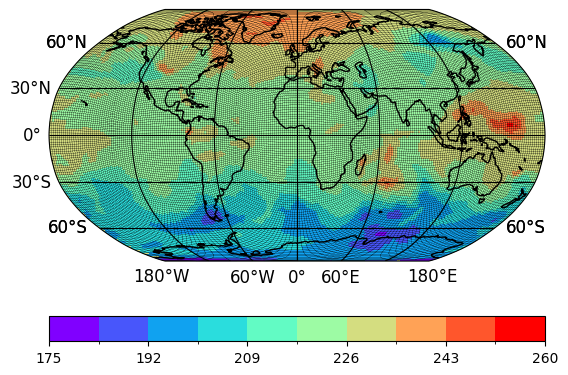

In [10]:
map_out = ds.psy.plot.mapplot(name=var, time_counter = time_counter, lev = lev, cmap = 'rainbow', datagrid={'c': 'k', 'lw': 0.1}, projection='robin')